## Import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data exploration

In [2]:
data=pd.read_csv('Groceries_dataset.csv')
data.shape
data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [3]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

[Text(0, 0.5, 'Items Sold'), Text(0.5, 0, 'Date')]

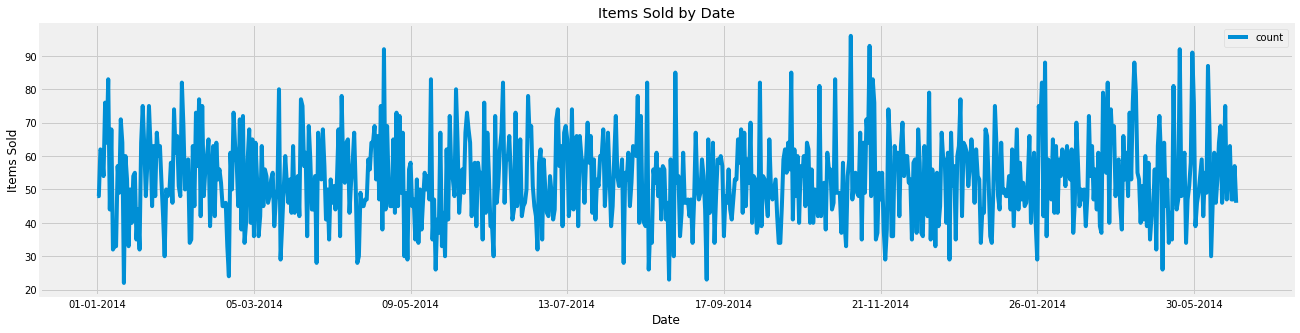

In [4]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(20,5), grid=True, title="Items Sold by Date").set(xlabel="Date", ylabel="Items Sold")

In [5]:
d=data.set_index(['Date'])
d.index=pd.to_datetime(d.index)

In [6]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

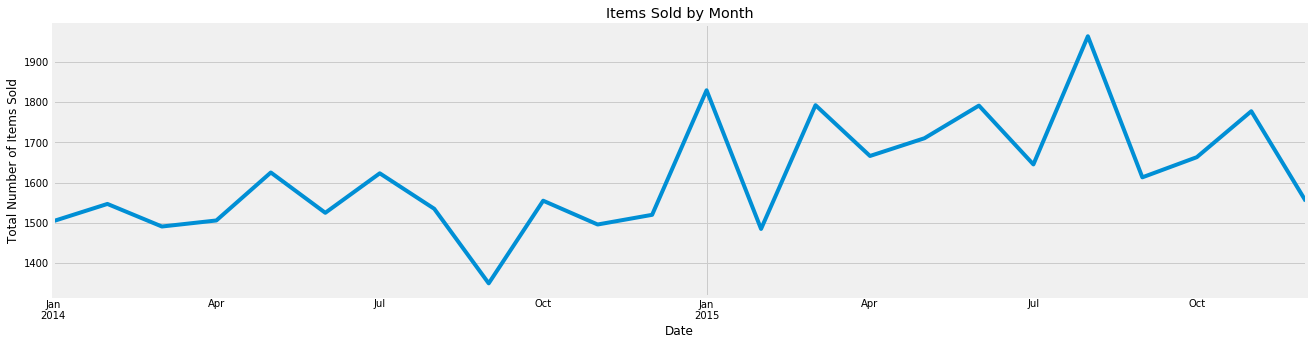

In [7]:
d.resample("M")['itemDescription'].count().plot(figsize=(20,5), grid=True, title="Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0, 0.5, 'Items Sold'), Text(0.5, 0, 'Date')]

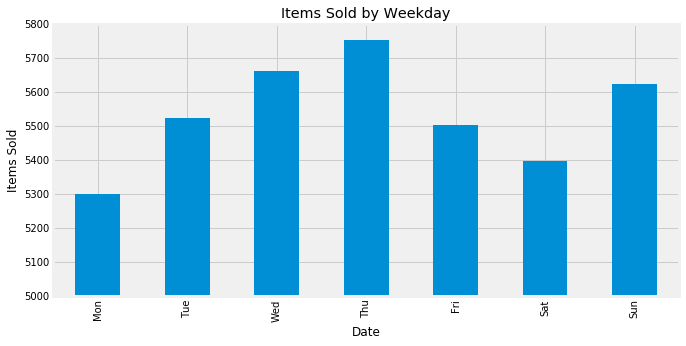

In [8]:
d["Weekday1"] = d.index.weekday
d["Weekday"] = d["Weekday1"]
d["Weekday"].replace({0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}, inplace=True)
#d.head(10)
d['Weekday'] = pd.Categorical(d['Weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],ordered=True)
#print(d['Weekday'])
d.groupby('Weekday').itemDescription.count().plot(figsize=(10,5), grid=True, title="Items Sold by Weekday", kind='bar', ylim=(5000,5800)).set(xlabel="Date", ylabel="Items Sold")

[Text(0, 0.5, 'f'), Text(0.5, 0, 'Items')]

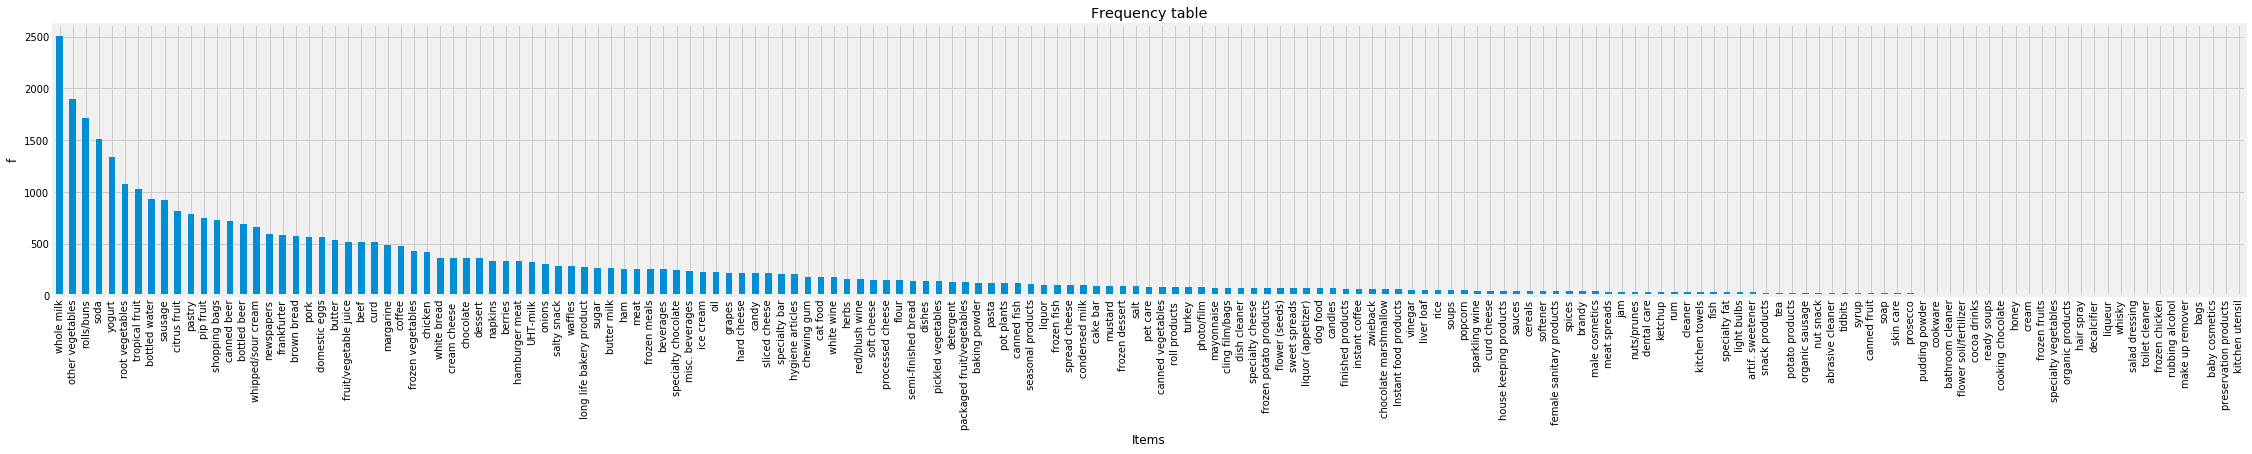

In [9]:
data['itemDescription'].value_counts().plot(figsize=(35,5), title="Frequency table", kind='bar').set(xlabel="Items", ylabel="f")

In [10]:
data['Date'].nunique()

728

In [11]:
d_member=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
txns = [i[1]['itemDescription'].tolist() for i in list(data.groupby(['Member_number','Date']))]
te = TransactionEncoder()
te_ary = te.fit(txns).transform(txns)
#te.columns_
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
txn = pd.DataFrame(te_ary, columns=te.columns_)
pf = txn.describe()

In [15]:
pf

Instant food products UHT-milk abrasive cleaner artif. sweetener  \
count                  14963    14963            14963            14963   
unique                     2        2                2                2   
top                    False    False            False            False   
freq                   14903    14643            14941            14934   

       baby cosmetics   bags baking powder bathroom cleaner   beef berries  \
count           14963  14963         14963            14963  14963   14963   
unique              2      2             2                2      2       2   
top             False  False         False            False  False   False   
freq            14960  14959         14842            14946  14455   14637   

        ... turkey vinegar waffles whipped/sour cream whisky white bread  \
count   ...  14963   14963   14963              14963  14963       14963   
unique  ...      2       2       2                  2      2           2   
top     ...  False   False   False              False  False       False   
freq    ...  14883   14912   14686              14309  14955       14604   

       white wine whole milk yogurt zwieback  
count       14963      14963  14963    14963  
unique          2          2      2        2  
top         False      False  False    False  
freq        14788      12600  13678    14903  

[4 rows x 167 columns]

In [18]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
txns

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [19]:
f

Instant food products      60
UHT-milk                  320
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               359
white wine                175
whole milk               2363
yogurt                   1285
zwieback                   60
Length: 167, dtype: object

In [20]:
item

Count                      Item
164   2363                whole milk
102   1827          other vegetables
122   1646                rolls/buns
138   1453                      soda
165   1285                    yogurt
123   1041           root vegetables
156   1014            tropical fruit
12     908             bottled water
130    903                   sausage
30     795              citrus fruit
105    774                    pastry
109    734                 pip fruit
133    712             shopping bags
20     702               canned beer
11     678              bottled beer
160    654        whipped/sour cream
95     582                newspapers
56     565               frankfurter
14     563               brown bread
111    555                      pork
49     555             domestic eggs
15     527                    butter
64     509     fruit/vegetable juice
8      508                      beef
40     504                      curd
88     482                 margarine
34     473                    coffee
63     419         frozen vegetables
27     417                   chicken
162    359               white bread
39     354             cream cheese 
28     353                 chocolate
44     353                   dessert
94     331                   napkins
68     327            hamburger meat
9      326                   berries
1      320                  UHT-milk
99     303                    onions
128    281               salty snack
159    277                   waffles
85     268  long life bakery product
150    265                     sugar
16     263               butter milk
67     256                       ham
90     252                      meat
61     251              frozen meals
10     248                 beverages
145    239       specialty chocolate
92     236           misc. beverages
74     227                 ice cream

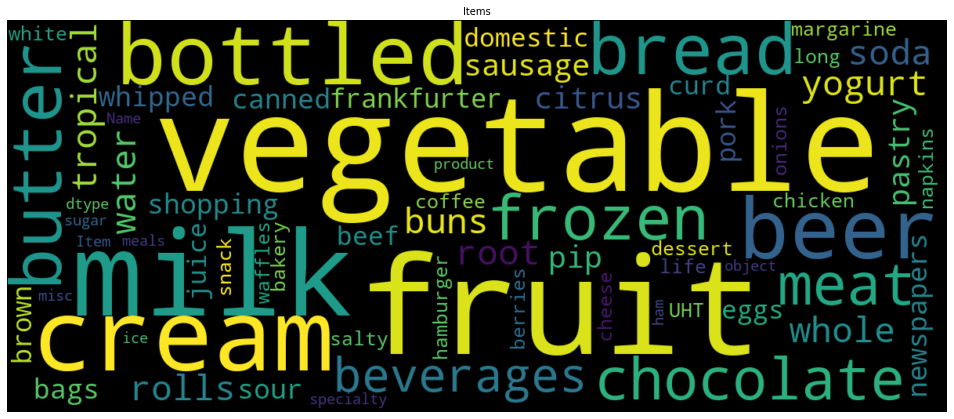

In [21]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 500, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Items',fontsize = 10)
plt.show()

In [23]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

## Apriori algorithm

In [71]:
freq_items = apriori(txn, min_support=0.001, use_colnames=True, verbose=1)
len(freq_items.index)    #freq_items.shape[0]

Processing 28 combinations | Sampling itemset size 4e 3


750

In [75]:
freq_items.head()

support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.001470       (abrasive cleaner)
3  0.001938       (artif. sweetener)
4  0.008087          (baking powder)

In [76]:
freq_items.tail()

support                           itemsets
745  0.001136  (whole milk, rolls/buns, sausage)
746  0.001002     (whole milk, soda, rolls/buns)
747  0.001337   (whole milk, yogurt, rolls/buns)
748  0.001069        (whole milk, soda, sausage)
749  0.001470      (whole milk, yogurt, sausage)

In [88]:
freq_items['count'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.tail(10)

support                                    itemsets  count
740  0.011161                        (whole milk, yogurt)      2
741  0.001136        (soda, rolls/buns, other vegetables)      3
742  0.001203  (whole milk, rolls/buns, other vegetables)      3
743  0.001136        (whole milk, soda, other vegetables)      3
744  0.001136      (whole milk, yogurt, other vegetables)      3
745  0.001136           (whole milk, rolls/buns, sausage)      3
746  0.001002              (whole milk, soda, rolls/buns)      3
747  0.001337            (whole milk, yogurt, rolls/buns)      3
748  0.001069                 (whole milk, soda, sausage)      3
749  0.001470               (whole milk, yogurt, sausage)      3

In [85]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

antecedents         consequents  antecedent support  \
0     (bottled water)          (UHT-milk)            0.060683   
1          (UHT-milk)     (bottled water)            0.021386   
2  (other vegetables)          (UHT-milk)            0.122101   
3          (UHT-milk)  (other vegetables)            0.021386   
4        (rolls/buns)          (UHT-milk)            0.110005   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.021386  0.001069    0.017621  0.823954 -0.000228    0.996168  
1            0.060683  0.001069    0.050000  0.823954 -0.000228    0.988755  
2            0.021386  0.002139    0.017515  0.818993 -0.000473    0.996060  
3            0.122101  0.002139    0.100000  0.818993 -0.000473    0.975443  
4            0.021386  0.001804    0.016403  0.767013 -0.000548    0.994934

In [97]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(0.7,0.2)

antecedents   consequents  antecedent support  \
1210  (rolls/buns, sausage)  (whole milk)            0.005347   
1234      (yogurt, sausage)  (whole milk)            0.005748   

      consequent support   support  confidence      lift  leverage  conviction  
1210            0.157923  0.001136    0.212500  1.345594  0.000292    1.069304  
1234            0.157923  0.001470    0.255814  1.619866  0.000563    1.131541

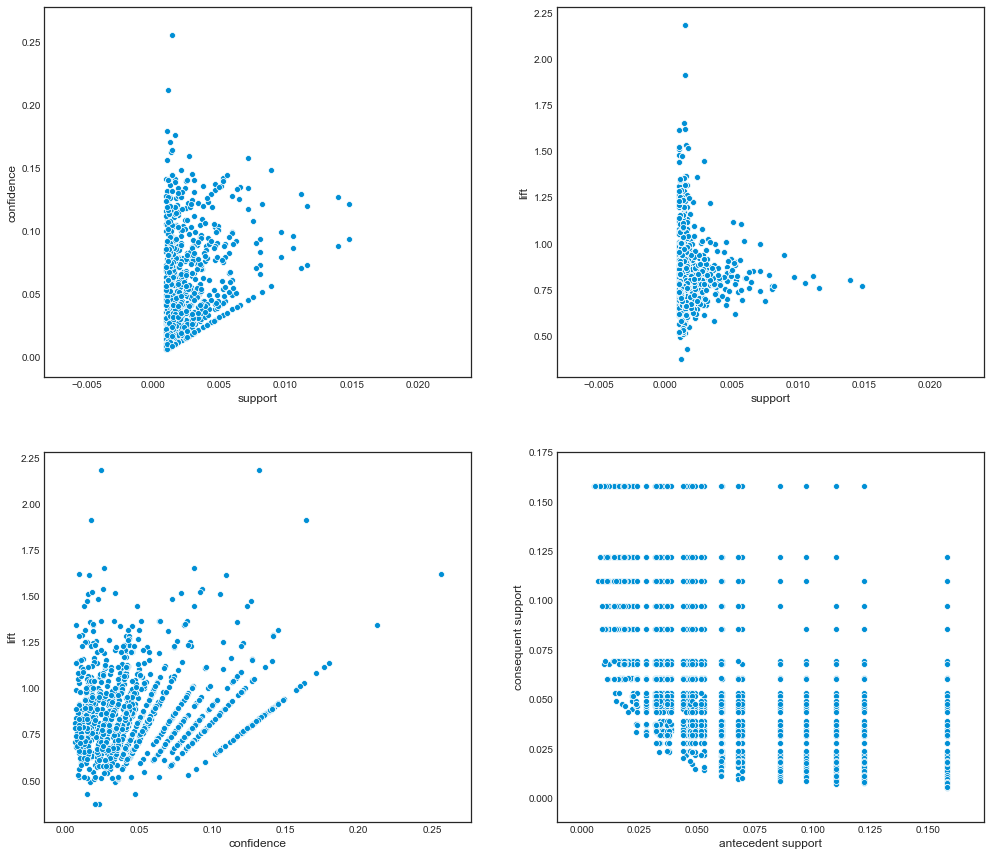

In [98]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

Support and confidence has linear relationship
Lift has strong relationship with confidence below .10. 
In antecedent and consequent support relationship there is no linear relationship

## Network diagram of rules
Here we make network diagram of specified number of rules where we can see the antecedents and consequents connected to the rules

C:\Users\farma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\farma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\farma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\farma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



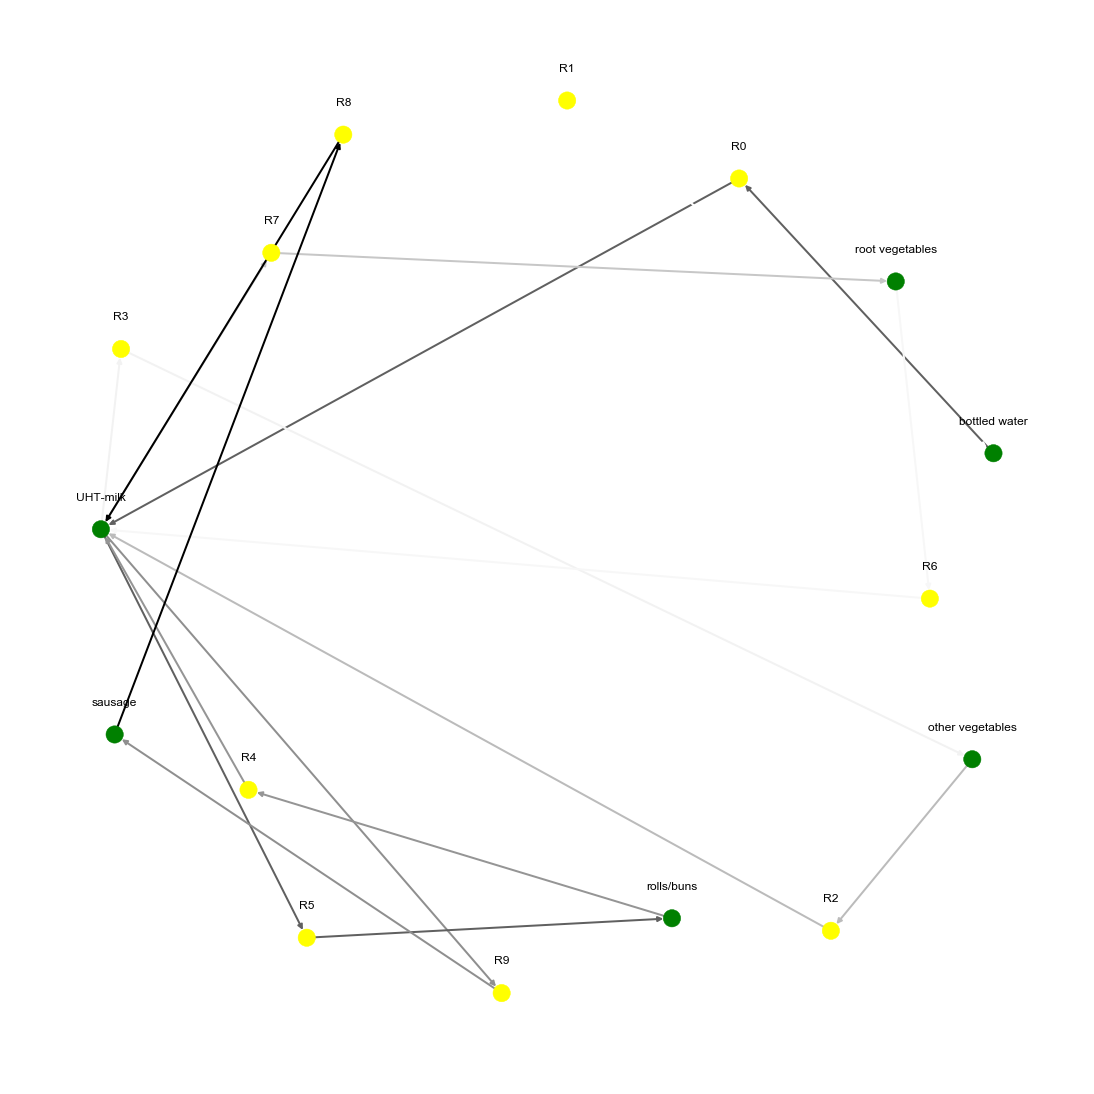

In [99]:
'''a function to build a network diagram connecting antecedents and consequents'''
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([a])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Calling function with 10 rules
draw_graph(rules, 10)

The arrow coming to the rules(yellow circle) is from anticedents and the arrows going from rules circle are towards conequents.

## Strength of association using heatmap

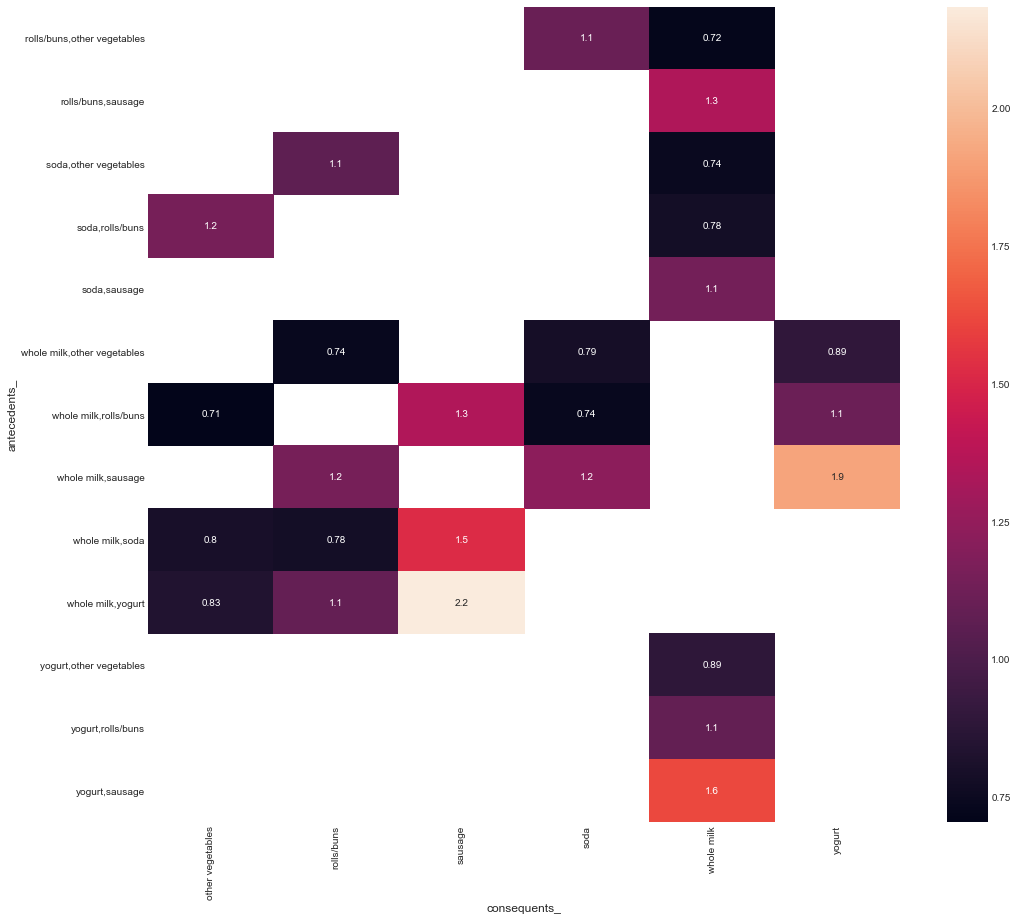

In [100]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()